### Training the model

In [1]:
import numpy as np
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb

In [3]:
n_unique_words = 10000 # cut texts after this number of words
maxlen = 200
batch_size = 128

In [4]:
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=n_unique_words)

In [5]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [6]:
#The model
model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [7]:
history=model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=12,
           validation_data=[x_test, y_test])

Epoch 1/12
196/196 [==============================] - 113s 563ms/step - loss: 0.4378 - accuracy: 0.7879 - val_loss: 0.3357 - val_accuracy: 0.8636
Epoch 2/12
196/196 [==============================] - 114s 583ms/step - loss: 0.2381 - accuracy: 0.9088 - val_loss: 0.3006 - val_accuracy: 0.8704
Epoch 3/12
196/196 [==============================] - 127s 651ms/step - loss: 0.1818 - accuracy: 0.9357 - val_loss: 0.3342 - val_accuracy: 0.8641
Epoch 4/12
196/196 [==============================] - 128s 653ms/step - loss: 0.1366 - accuracy: 0.9505 - val_loss: 0.4058 - val_accuracy: 0.8622
Epoch 5/12
196/196 [==============================] - 126s 646ms/step - loss: 0.1090 - accuracy: 0.9627 - val_loss: 0.4390 - val_accuracy: 0.8591
Epoch 6/12
196/196 [==============================] - 128s 653ms/step - loss: 0.0919 - accuracy: 0.9686 - val_loss: 0.4669 - val_accuracy: 0.8591
Epoch 7/12
196/196 [==============================] - 129s 661ms/step - loss: 0.1085 - accuracy: 0.9626 - val_loss: 0.4934 -

In [8]:
model.save('biLSTM')

INFO:tensorflow:Assets written to: biLSTM\assets


INFO:tensorflow:Assets written to: biLSTM\assets


In [9]:
print(history.history['loss'])
print(history.history['accuracy'])

[0.4378429055213928, 0.23813723027706146, 0.1818075180053711, 0.13663919270038605, 0.10897886008024216, 0.09194107353687286, 0.10851233452558517, 0.08726976811885834, 0.051511865109205246, 0.04949335381388664, 0.03094913810491562, 0.02496068924665451]
[0.787880003452301, 0.908840000629425, 0.9357200264930725, 0.9505199790000916, 0.9627199769020081, 0.968559980392456, 0.9625599980354309, 0.9703199863433838, 0.9838399887084961, 0.9848399758338928, 0.9914799928665161, 0.9933599829673767]


### Plotting model performance

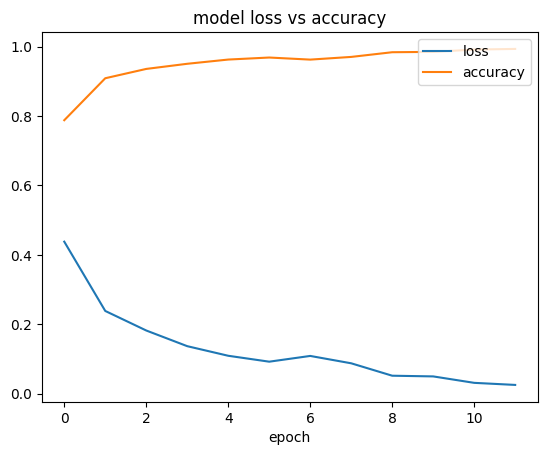

In [10]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show()